In [1]:
from utils import vector_simplify, pretty_results, get_vector_arguments

%display latex

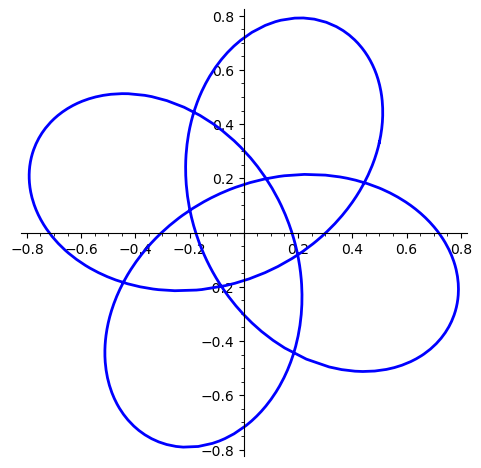

In [2]:
# Curve definition
curve_alpha(t) = (1/2 * cos(3 * t) + 1/3 * sin(t), 
                  1/2 * sin(3 * t) + 1/3 * cos(t))

# Plot
parametric_plot(curve_alpha, (t,0, 2*pi), thickness=2)

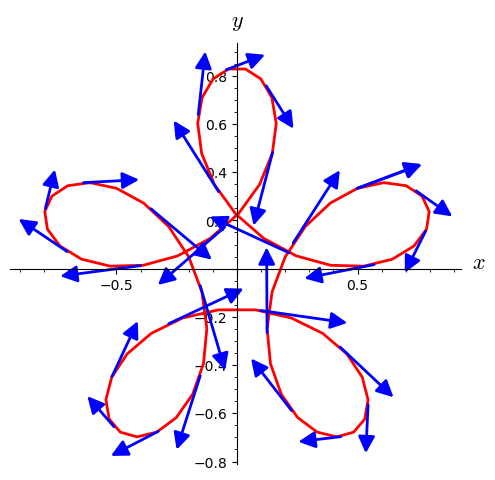

In [3]:
#ref: https://doc.sagemath.org/html/en/reference/manifolds/sage/manifolds/differentiable/curve.html#curves-in-manifolds

# Define dimention and variables
M = Manifold(2, 'M')
X.<x,y> = M.chart()

# Define curve
c = M.curve([1/2 * cos(t) + 1/3 * sin(4 * t), 
             1/2 * sin(t) + 1/3 * cos(4 * t)], (t, 0, 2*pi))

# Vectors tangent
v = c.tangent_vector_field() ; v

# Plot
show(c.plot(thickness=2, aspect_ratio=1) +
     v.plot(chart=X, number_values=30, scale=.2))

In [4]:
# Define curve
curve_alpha(s) = (2 * cos(s), 2 * sin(s))

# Calculate the derivative
x = get_vector_arguments(curve_alpha).pop()
curve_alpha_x = curve_alpha.derivative(x)
    
# Calcular comprimento de arco de 0 a t
t = var("t")
assume(t>0)
s = integrate(norm(curve_alpha_x), (x,0,t))
s = s.simplify_full()

# Plot equation
pretty_results((r"\int_0^t || C'(x) || dx", s))

\begin{align*} \int_0^t || C'(x) || dx &= 2 \, t \\ \end{align*} \\

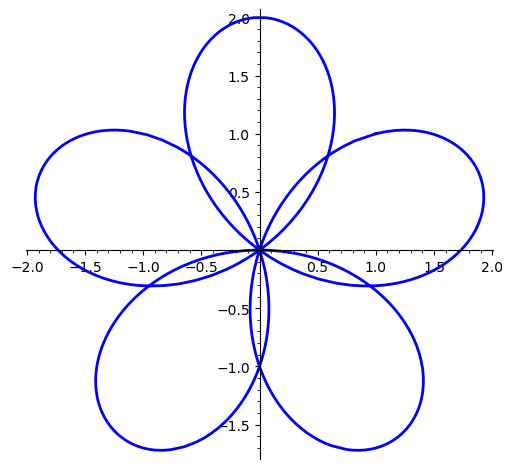

In [5]:
# Curve definition
alpha(t) = (cos(t) + sin(4 * t), sin(t) + cos(4 * t))

# Reparametrization
phi(x) = 2 * x + 1
beta(t) = alpha(phi(t))

# Plot
parametric_plot(alpha, (t,0, 2*pi), thickness=2)

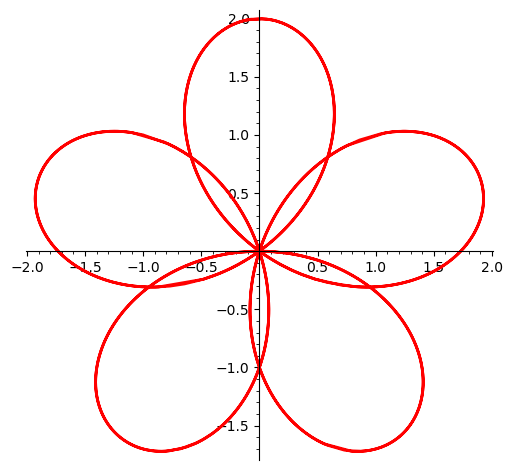

In [6]:
parametric_plot(beta, (t,0, 2*pi), thickness=2, color='red')

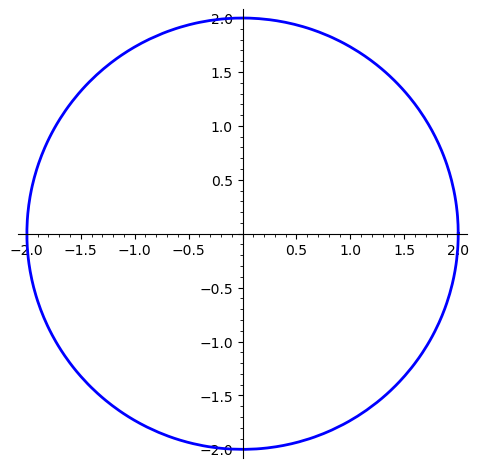

In [7]:
# Curve definition
alpha(s) = (2 * cos(s), 2 * sin(s))

# Plot
parametric_plot(alpha, (s,0, 2*pi), thickness=2)

In [8]:
# Identify curve parameter
x = get_vector_arguments(alpha).pop()

# Calculate the derivatives
alpha_x = alpha.derivative(x)
    
# Calculate arc length from 0 to t
t = var("t")
assume(t>0)
comp_arco = integrate(norm(alpha_x), (x,0,t))

t = comp_arco.arguments()[0]
    
# Find t in terms of s
s = var("s")
param_comp_arco = solve(s == comp_arco,t)[0]
    
# Replace original parameter in curve 
alpha_subs = alpha(t).subs(param_comp_arco)
alpha_subs = vector_simplify(alpha_subs)
    
# Reset function argument
alpha_param(s) = tuple(coord for coord in alpha_subs)

# New curve plot
print("Curva reparametrizada:")
pretty_results((r"\alpha(s)", alpha_param), use_colon=True)

Curva reparametrizada:


\begin{align*} \alpha(s) :& \quad s \ {\mapsto}\ \left(2 \, \cos\left(\frac{1}{2} \, s\right),\,2 \, \sin\left(\frac{1}{2} \, s\right)\right) \\ \end{align*} \\

In [9]:
# Curve definition
curve(t) = (2 * cos(t), 2 * sin(t))

# Calculate the derivatives
curve_t = curve.derivative(t)
curve_tt = curve_t.derivative(t)

# Calculate J(c'(t))
curve_t_rotation(t) = (- curve_t[1], curve_t[0])

# Calculate the curvature
curvatura = curve_t_rotation.dot_product(curve_tt)/norm(curve_t)^3
curvatura = curvatura.simplify_full()

# Plot
pretty_results((r"K(s)", curvatura), use_colon=True)

\begin{align*} K(s) :& \quad \frac{1}{2} \\ \end{align*} \\

In [10]:
# Curve definition
alpha(t) = (sin(2 * t), cos(t))

# Diedro de Frenet
T(t) = alpha.derivative(t)/norm(alpha.derivative(t))

N(t) = (- T[1], T[0])

# Plot
pretty_results((r"T(t)", T))

\begin{align*} T(t) &= t \ {\mapsto}\ \left(\frac{2 \, \cos\left(2 \, t\right)}{\sqrt{4 \, \cos\left(2 \, t\right)^{2} + \sin\left(t\right)^{2}}},\,-\frac{\sin\left(t\right)}{\sqrt{4 \, \cos\left(2 \, t\right)^{2} + \sin\left(t\right)^{2}}}\right) \\ \end{align*} \\

In [11]:
pretty_results((r"N(t)", N))

\begin{align*} N(t) &= t \ {\mapsto}\ \left(\frac{\sin\left(t\right)}{\sqrt{4 \, \cos\left(2 \, t\right)^{2} + \sin\left(t\right)^{2}}},\,\frac{2 \, \cos\left(2 \, t\right)}{\sqrt{4 \, \cos\left(2 \, t\right)^{2} + \sin\left(t\right)^{2}}}\right) \\ \end{align*} \\

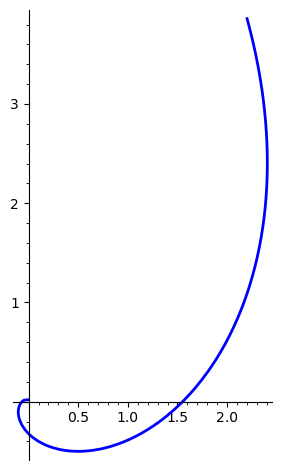

In [12]:
# Define curvature and theta_0
curvatura(t) = 1/t
theta_0 = 0

# Identify the Curve Parameter
t = curvatura.arguments()[0]
    
# Build Angle Function
theta(t) = integrate(curvatura(t), t) + theta_0

# Build Curve From Angle Function
aux(t) = (cos(theta(t)), sin(theta(t)))

curva_ang(t) = integrate(aux(t), t)

curva_ang = vector_simplify(curva_ang)
    
# Export function with n-tuple
curva_construida = tuple(coord for coord in curva_ang)

# Plot
parametric_plot(curva_construida, (t,0, 2 * pi), thickness=2)
#pretty_results((r"C(t)", curva_construida))

In [13]:
# Curve definition
alpha(t) = (2 * t * sin(50 * t), 3 * t * cos(50 * t), t^2)

# Plot
parametric_plot(alpha, (t,0, 2*pi), thickness=2)

Graphics3d Object

In [14]:
# Curve
alpha(t) = (sin(2 * t), cos(2 * t), t)

# Calculate the derivatives
alpha_t = alpha.derivative(t)
alpha_tt = alpha_t.derivative(t)
    
# Apply General Curvature Formula
curvature = norm(alpha_t.cross_product(alpha_tt)) / norm(alpha_t)^3
curvature = curvature.simplify_full()

pretty_results((r"K(t)", curvature))

\begin{align*} K(t) &= \frac{4}{5} \\ \end{align*} \\

In [15]:
# Curve
alpha(t) = (sin(2 * t), cos(2 * t), t)

# Calculate the derivatives
alpha_t = alpha.derivative(t)
alpha_tt = alpha_t.derivative(t)
alpha_ttt = alpha_tt.derivative(t)
    
# Get Vector Product of Velocity and Acceleration Vectors
prod_veloc_acel = alpha_t.cross_product(alpha_tt)
    
# Apply General Twist Formula
torcao = (prod_veloc_acel * alpha_ttt) / norm(prod_veloc_acel)^2
torcao = torcao.simplify_full()

pretty_results((r"\mathcal{T}(t)", torcao))

\begin{align*} \mathcal{T}(t) &= -\frac{2}{5} \\ \end{align*} \\